# Lab4 - Tidying, Cleaning, Imputation, and Outlier Detection
* note: to test on a different machine, run ```pip install -r requirements.txt```

# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [141]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [142]:
df = pd.read_csv('data/pew-raw.csv')

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [143]:
# show top 5 rows
df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [144]:
# show statistics data
df.describe()

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,134.200000,188.100000,223.000000,212.600000,193.200000,328.400000
std,205.433309,306.460601,370.235661,338.247838,308.833576,523.264794
min,1.000000,9.000000,7.000000,9.000000,10.000000,30.000000
25%,16.000000,19.500000,24.250000,24.250000,23.250000,40.750000
50%,23.500000,27.000000,33.500000,43.000000,34.000000,82.500000
75%,177.750000,191.500000,192.000000,198.750000,166.750000,201.500000
max,575.000000,869.000000,1064.000000,982.000000,881.000000,1486.000000


In [145]:
# show meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   religion  10 non-null     object
 1    <$10k    10 non-null     int64 
 2    $10-20k  10 non-null     int64 
 3   $20-30k   10 non-null     int64 
 4   $30-40k   10 non-null     int64 
 5    $40-50k  10 non-null     int64 
 6   $50-75k   10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 692.0+ bytes


***What does not seem right in the above dataframe?***
* The column name format is not consistent, e.g "<$10k" and "$10-20k"
* The data type of the column "religion" is object
* Except column 'religion', the rest of the columns could be just one feature

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [146]:
# convert the dataframe to a new one by making all the column headers exept 'religion" to be feature "income_range", and the values to be feature 'citizens_count'
df_pew_tidy = pd.melt(df, id_vars=['religion'], var_name='income_range',value_name='citizens_count')
df_pew_tidy.head()

,religion,income_range,citizens_count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15


In [147]:
# replace income_range '<$10k" to be '$0-10k' so that it's consistent with other income_range
df_pew_tidy['income_range'] = df_pew_tidy['income_range'].str.replace("<$10", " $0-10k")
# remove space, $ and k from income_range values
df_pew_tidy['income_range'] = df_pew_tidy['income_range'].str.replace(' ', '')
df_pew_tidy['income_range'] = df_pew_tidy['income_range'].str.replace('$','')
df_pew_tidy['income_range'] = df_pew_tidy['income_range'].str.replace('k','')
# show the top 5 rows of the updated dataframe
df_pew_tidy.head()

,religion,income_range,citizens_count
0,Agnostic,0-10,27
1,Atheist,0-10,12
2,Buddhist,0-10,27
3,Catholic,0-10,418
4,Dont know/refused,0-10,15


In [148]:
# add column min_income to be the value before '-', and max_income the value after '-' of the income_range
df_pew_tidy['min_income']=np.array(df_pew_tidy['income_range'].str.split('-').to_list())[:,0].astype(int)
df_pew_tidy['max_income']=np.array(df_pew_tidy['income_range'].str.split('-').to_list())[:,1].astype(int)
df_pew_tidy.head()

,religion,income_range,citizens_count,min_income,max_income
0,Agnostic,0-10,27,0,10
1,Atheist,0-10,12,0,10
2,Buddhist,0-10,27,0,10
3,Catholic,0-10,418,0,10
4,Dont know/refused,0-10,15,0,10


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`. The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [149]:
# read csv data using encoding unicode_escape into df_billboard
df_billboard = pd.read_csv('./data/billboard.csv', encoding='unicode_escape')

2. Observe the first few rows of the dataset.

In [150]:
df_billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             317 non-null    int64  
 1   artist.inverted  317 non-null    object 
 2   track            317 non-null    object 
 3   time             317 non-null    object 
 4   genre            317 non-null    object 
 5   date.entered     317 non-null    object 
 6   date.peaked      317 non-null    object 
 7   x1st.week        317 non-null    int64  
 8   x2nd.week        312 non-null    float64
 9   x3rd.week        307 non-null    float64
 10  x4th.week        300 non-null    float64
 11  x5th.week        292 non-null    float64
 12  x6th.week        280 non-null    float64
 13  x7th.week        269 non-null    float64
 14  x8th.week        260 non-null    float64
 15  x9th.week        253 non-null    float64
 16  x10th.week       244 non-null    float64
 17  x11th.week      

***What is wrong with the above dataset?***
* there are a lot of missing values
* all 76 weeks are columns which make the dataset has too many features
* the value for 'x1st.week' is type int64, but float64 for other '***.week" 

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [152]:
# # convert the dataframe to a new one by making all the 'week' column headers be feature "week", and the values to be feature 'ranking'
df_billboard_tidy = pd.melt(df_billboard, id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered','date.peaked'], var_name='Week',value_name='ranking')
df_billboard_tidy.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


<p style="margin-left: 40px;">If we inspect the current dataframe. We find that it is structured in a better way than before.</p>
<p style="margin-left: 40px;">However, the ***Week*** column looks a bit ugly!</p>

4. Let's try to place only the week number in that column without the extras surronding it.

In [153]:
# using regular expression to extract the week number
df_billboard_tidy['Week'] = df_billboard_tidy['Week'].str.extract(r'(\d+)').astype(int)

5. Now let's inspect the ***Week*** column in the dataframe.

In [154]:
df_billboard_tidy['Week'].head()

0    1
1    1
2    1
3    1
4    1
Name: Week, dtype: int64

<p style="margin-left: 40px;">Next, let's try to find the date at which the song ranked the number that is shown per row.</p>

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [155]:
# Add weeks to start_date
df_billboard_tidy['ranking_date'] = pd.to_datetime(df_billboard_tidy['date.entered']) + pd.to_timedelta(df_billboard_tidy['Week'], unit='W')

df_billboard_tidy.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,ranking,ranking_date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-30
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-19
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-30
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-19
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-08-12


<p style="margin-left: 40px;">*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*</p>


***What is the problem with the calculation above?***
* it adds new calculated columns to the dataframe, which makes 'Week" column redundant

7. Let's only keep necessary columns

In [156]:
# drop column 'Week'
df_billboard_tidy = df_billboard_tidy.drop(columns=['Week'])

8. How to rename your columns?

In [157]:
# rename columns
df_billboard_tidy = df_billboard_tidy.rename(columns={'artist.inverted': 'artist_inverted', 'date.entered': 'date_entered', 'date.peaked': 'date_peaked'})

<p style="margin-left: 40px;">Display the dataframe</p>

In [158]:
df_billboard_tidy.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,ranking,ranking_date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78.0,2000-09-30
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15.0,2000-02-19
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71.0,1999-10-30
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41.0,2000-08-19
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57.0,2000-08-12


<p style="margin-left: 40px;">In the above dataframe, there are some *NaN* values. What are we going to do?</p>

9. Apply quick data cleaning and then observe the dataset

In [159]:
# drop NaN values
df_billboard_clean = df_billboard_tidy.dropna()
df_billboard_clean.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,ranking,ranking_date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78.0,2000-09-30
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15.0,2000-02-19
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71.0,1999-10-30
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41.0,2000-08-19
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57.0,2000-08-12


In [160]:
df_billboard_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5307 entries, 0 to 20334
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             5307 non-null   int64         
 1   artist_inverted  5307 non-null   object        
 2   track            5307 non-null   object        
 3   time             5307 non-null   object        
 4   genre            5307 non-null   object        
 5   date_entered     5307 non-null   object        
 6   date_peaked      5307 non-null   object        
 7   ranking          5307 non-null   float64       
 8   ranking_date     5307 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 414.6+ KB


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [161]:
# read cars.csv to datafram with semicolon delimiter
df_cars = pd.read_csv('./data/cars.csv', sep=';')
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US


First Row seems to be the datatype, we need to remove it

In [162]:
# remove first row
df_cars.drop(index=0, inplace=True)

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [163]:
# display null value count for each column
df_cars.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [164]:
# calculate missing value percentage
total_missing_percent = df_cars.isna().sum().sum() / df_cars.size * 100
print(total_missing_percent)

0.19157088122605362


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

In [165]:
# columns that have missing values
missing_cols = df_cars.columns[df_cars.isna().any()]
print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
Index(['MPG', 'Displacement', 'Horsepower', 'Weight'], dtype='object')


Let's observe how many columns we lost

In [166]:
print(f"Count of the columns that have missing values: {len(missing_cols)}")

Count of the columns that have missing values: 4


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

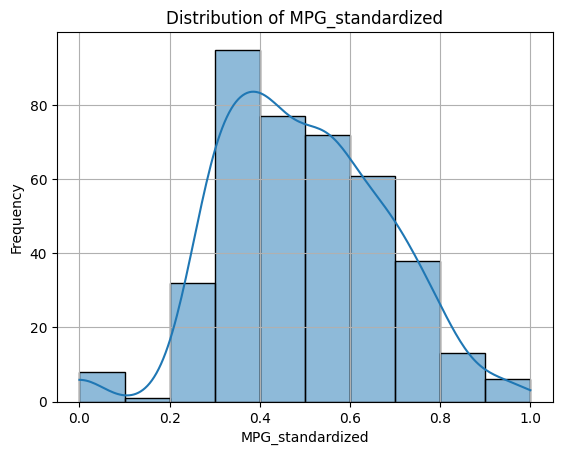

In [167]:
from sklearn.preprocessing import MinMaxScaler
# Standardize (mean=0, std=1)
scaler = MinMaxScaler()
df_cars['MPG_standardized'] = scaler.fit_transform(df_cars[['MPG']])
# Histogram with seaborn
sns.histplot(df_cars['MPG_standardized'], kde=True, bins=10)
plt.title('Distribution of MPG_standardized')
plt.xlabel('MPG_standardized')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [168]:
# change MPG from object to float
df_cars['MPG'] = df_cars['MPG'].astype(float)

Now let's see what is the mean of the MPG column

In [169]:
# calculate MPG mean
mean_mpg = df_cars['MPG'].mean().round(2)
print(f"MPG mean: {mean_mpg}")

MPG mean: 23.1


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [170]:
df_cars['MPG'] = df_cars['MPG'].fillna(mean_mpg)
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,MPG_standardized
1,Chevrolet Chevelle Malibu,23.1,8,307.0,130.0,3504.,12.0,70,US,NaN
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US,0.321888
3,Plymouth Satellite,23.1,8,318.0,150.0,3436.,11.0,70,US,NaN
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US,0.343348
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US,0.364807


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [171]:
from sklearn.impute import SimpleImputer

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [172]:
# Create the imputer for median strategy
imputer = SimpleImputer(strategy='median')
# Select columns to impute
cols_to_impute = ['Displacement', 'Horsepower', 'Weight']
# Step 1: Fit the imputer to the data
imputer.fit(df_cars[cols_to_impute])
# Step 2: Transform the data using the fitted imputer
df_cars[cols_to_impute] = imputer.transform(df_cars[cols_to_impute])
# observe result dataframe
df_cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,MPG_standardized
1,Chevrolet Chevelle Malibu,23.1,8,307.0,130.0,3504.0,12.0,70,US,NaN
2,Buick Skylark 320,15.0,8,350.0,92.5,3693.0,11.5,70,US,0.321888
3,Plymouth Satellite,23.1,8,318.0,150.0,3436.0,11.0,70,US,NaN
4,AMC Rebel SST,16.0,8,151.0,150.0,2815.0,12.0,70,US,0.343348
5,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,0.364807


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal) objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





The dataset used is the Diabetes dataset and it is preloaded in the Sklearn library.

In [173]:
from sklearn.datasets import load_diabetes

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

<Axes: ylabel='bmi'>

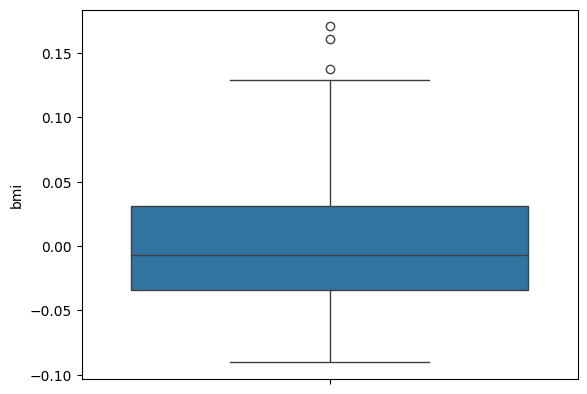

In [174]:
# Box Plot for bmi
sns.boxplot(df_diabetics['bmi'])

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

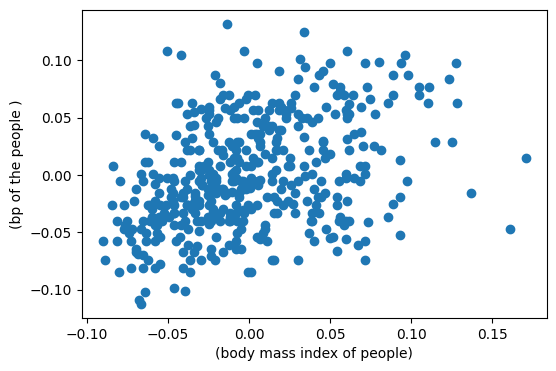

In [175]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [176]:
# calculate the z-score for age column and put it to column z-score-age
from scipy import stats

df_diabetics['z-score-age'] = np.abs(stats.zscore(df_diabetics['age']))
df_diabetics['z-score-age'].head()

0    0.800500
1    0.039567
2    1.793307
3    1.872441
4    0.113172
Name: z-score-age, dtype: float64

Now to define an outlier, threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [177]:
# filter rows with z-score-age > 2
df_diabetics_z_age_bigger_2 = df_diabetics[df_diabetics['z-score-age'] > 2]
df_diabetics_z_age_bigger_2.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,z-score-age
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215,2.025181
26,-0.107226,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220,2.254290
41,-0.099961,-0.044642,-0.067641,-0.108956,-0.074494,-0.072712,0.015505,-0.039493,-0.049872,-0.009362,2.101550
77,-0.096328,-0.044642,-0.036385,-0.074527,-0.038720,-0.027618,0.015505,-0.039493,-0.074093,-0.001078,2.025181
79,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.019980,0.011824,-0.002592,-0.068332,-0.025930,2.177920


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [178]:
# calculate the interquartile range (IQR) for the 'bmi' column
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(f"IQR: {IQR}")

IQR: 0.06520763046978838


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [179]:
# Above Upper bound
upper = Q3+1.5*IQR
print("Upper Bound:", upper)

# Below Lower bound
lower = Q1-1.5*IQR
print("Lower Bound:", lower)

Upper Bound: 0.12879000811776306
Lower Bound: -0.13204051376139045


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset, because in all the above methods of detecting the outliers, end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [180]:
# create a copy of the dataframe
df_diabetes = df_diabetics.copy()
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,z-score-age
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,0.800500
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0.039567
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1.793307
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1.872441
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0.113172
